<a href="https://colab.research.google.com/github/nicobargioni/procesamiento-del-habla/blob/main/NLP_Clase_1_%7C_Nubes_de_Palabras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clase 1 - Entrega 1

EJERCICIO CONSIGNA
Cree una nube de palabras de un texto en español.

Dicho texto puede ser descargado de Internet (webscrapping) o extraído del dataset de alguna librería.

Puede usar cualquier libreria o herramienta para obtener el texto de su interés.

En este notebook explica el paso a paso del proceso.

In [24]:
#@title Importo todo
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#defino la url que voy a scrappear
url = 'https://www.lavoz.com.ar/servicios/el-dolar-cerro-agosto-en-baja-y-el-banco-central-compro-us-380-millones/'

#defino el encabezado http de user agent para que el servidor no me bloquee
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

#envío un get al servidor con el encabezado enviado en los parámetros para que simule ser un navegador legítimo
response = requests.get(url, headers=headers)

#parseo el html y lo convierto en un objeto soup para poder navegarlo
soup = BeautifulSoup(response.content, 'html.parser')

#guardo todas las <p> en una variable
paragraphs = soup.find('div', class_='body col mx-auto my0').find_all('p')

#recorro todos los párrafos encontrados y armo una lista de textos separadas por un espacio
text = ' '.join([p.get_text() for p in paragraphs])

In [7]:
text

'El Gobierno sorteó la exigencia de un agosto que se vislumbraba exigente en materia financiera y cambiaria al mantener estable el precio del dólar, mientras el Banco Central compró U$S 380 millones de reservas. El dólar “blue” terminó al borde de perforar los $ 1.300, a 45 días de haber alcanzado el récord nominal de $ 1.500. En las casas de cambio de la Ciudad de Buenos Aires la divisa se terminó pagando $ 1.275 para la compra y $ 1.305 para la venta. En Córdoba su último precio fue de $ 1.319. El minuto a minuto de la cotización del dólar De esta forma la divisa paralela se derrumbó $ 80 a lo largo del período, convirtiendo a todo el resto de las inversiones –como por ejemplo un plazo fijo- en instrumentos más rentables. Incluso el precio del billete no sufrió el impacto del conocido “Lunes negro”, cuando el 19 de este mes la Bolsa de Japón se desplomó un 15% y arrastró al resto de los mercados. Este constante descenso de la cotización del dólar durante el mes redujo al mínimo la br

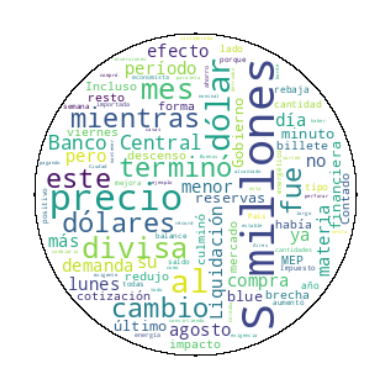

In [37]:
#defino las stopwords
stopwords = ["a", "ante", "bajo", "cabe", "con", "contra", "de", "desde", "durante", "en", "entre", "hacia", "hasta",
             "mediante", "para", "por", "según", "sin", "so", "sobre", "tras", "versus", "vía", "el", "la", "del", "que", "lo", "se", "es", "u", "s"
             "y", "una", "los", "un", "las", "y"]

#forma de cículo
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

#creo un objeto wc de 800 x 600 con sus stopwords definidas, con un máximo de 100 palabras, con fondo blanco, con forma de círculo, negando la repetición de palabras y definiendo el contorno
wc = WordCloud(width = 800, height = 600,
               stopwords = stopwords, max_words = 100, background_color = 'white', mask = mask, repeat = False, contour_width = 1, contour_color = "black")

#genero la nube de palabras
wc.generate(text)

#desactivo los ejes para que no se vean
plt.axis("off")

#muestro la nube de palabras
plt.imshow(wc, interpolation = "bilinear")